In [36]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [37]:
#load original .csv files, a years worth of data from January 2022 to October 2023 and concating them
path=r"C:\Users\Grahesh\OneDrive\Desktop\Cpston project\New folder"
df = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [38]:
#Changing coloumns started_at and ended_at to datetimestamp
df[['started_at','ended_at']] = df[['started_at','ended_at']].apply(pd.to_datetime)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [39]:
#Droping NaN and duplicate values in the data frame
df=df.dropna()
df=df.drop_duplicates()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [40]:
#calculate ride length by subtracting ended_at time from started_at time
df['ride_length']=df.ended_at-df.started_at
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02


In [41]:
#create columnds for: day of week, month, day, year, time, hour from started_at coloumn
df['Year'] = df['started_at'].dt.year 
df['Month'] = df['started_at'].dt.month
df['Day'] = df['started_at'].dt.day
df['Hour'] = df['started_at'].dt.hour
df['Date'] = df['started_at'].dt.date
df['weekday'] = df['started_at'].dt.dayofweek
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,Year,Month,Day,Hour,Date,weekday
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,2022,1,13,11,2022-01-13,3
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,2022,1,10,8,2022-01-10,0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,2022,1,25,4,2022-01-25,1
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,2022,1,4,0,2022-01-04,1
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,2022,1,20,1,2022-01-20,3


In [42]:
#Removing Unneccesary Data from the DataFrame
df=df.drop(['started_at','ended_at','start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng'],axis=1)
df.head()

,ride_id,rideable_type,start_station_name,end_station_name,member_casual,ride_length,Year,Month,Day,Hour,Date,weekday
0,C2F7DD78E82EC875,electric_bike,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:02:57,2022,1,13,11,2022-01-13,3
1,A6CF8980A652D272,electric_bike,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:04:21,2022,1,10,8,2022-01-10,0
2,BD0F91DFF741C66D,classic_bike,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,0 days 00:04:21,2022,1,25,4,2022-01-25,1
3,CBB80ED419105406,classic_bike,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,0 days 00:14:56,2022,1,4,0,2022-01-04,1
4,DDC963BFDDA51EEA,classic_bike,Michigan Ave & Jackson Blvd,State St & Randolph St,member,0 days 00:06:02,2022,1,20,1,2022-01-20,3


In [43]:
#create column for different seasons: Spring, Summer, Autumn, Winter
df['Date'] = pd.to_datetime(df['Date'])
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df['Date'].dt.month.apply(get_season)
df.head()

,ride_id,rideable_type,start_station_name,end_station_name,member_casual,ride_length,Year,Month,Day,Hour,Date,weekday,season
0,C2F7DD78E82EC875,electric_bike,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:02:57,2022,1,13,11,2022-01-13,3,Winter
1,A6CF8980A652D272,electric_bike,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:04:21,2022,1,10,8,2022-01-10,0,Winter
2,BD0F91DFF741C66D,classic_bike,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,0 days 00:04:21,2022,1,25,4,2022-01-25,1,Winter
3,CBB80ED419105406,classic_bike,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,0 days 00:14:56,2022,1,4,0,2022-01-04,1,Winter
4,DDC963BFDDA51EEA,classic_bike,Michigan Ave & Jackson Blvd,State St & Randolph St,member,0 days 00:06:02,2022,1,20,1,2022-01-20,3,Winter


In [44]:
#create column for different time_of_day: Night, Morning, Afternoon, Evening
def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Create 'time_of_day' column based on 'hour'
df['time_of_day'] = df['Hour'].apply(get_time_of_day)
df.head()

,ride_id,rideable_type,start_station_name,end_station_name,member_casual,ride_length,Year,Month,Day,Hour,Date,weekday,season,time_of_day
0,C2F7DD78E82EC875,electric_bike,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:02:57,2022,1,13,11,2022-01-13,3,Winter,Morning
1,A6CF8980A652D272,electric_bike,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:04:21,2022,1,10,8,2022-01-10,0,Winter,Morning
2,BD0F91DFF741C66D,classic_bike,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,0 days 00:04:21,2022,1,25,4,2022-01-25,1,Winter,Night
3,CBB80ED419105406,classic_bike,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,0 days 00:14:56,2022,1,4,0,2022-01-04,1,Winter,Night
4,DDC963BFDDA51EEA,classic_bike,Michigan Ave & Jackson Blvd,State St & Randolph St,member,0 days 00:06:02,2022,1,20,1,2022-01-20,3,Winter,Night


In [45]:
#Changing my Ride length to minutes
df['Ride_length'] = df['ride_length'].dt.total_seconds() / 60

In [46]:
#Removing those coloumns which are Ride_length zero or negative
df = df[df['Ride_length'] > 0]

In [47]:
#Final Cleaned Data file
df.head()

,ride_id,rideable_type,start_station_name,end_station_name,member_casual,ride_length,Year,Month,Day,Hour,Date,weekday,season,time_of_day,Ride_length
0,C2F7DD78E82EC875,electric_bike,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:02:57,2022,1,13,11,2022-01-13,3,Winter,Morning,2.950000
1,A6CF8980A652D272,electric_bike,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:04:21,2022,1,10,8,2022-01-10,0,Winter,Morning,4.350000
2,BD0F91DFF741C66D,classic_bike,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,0 days 00:04:21,2022,1,25,4,2022-01-25,1,Winter,Night,4.350000
3,CBB80ED419105406,classic_bike,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,0 days 00:14:56,2022,1,4,0,2022-01-04,1,Winter,Night,14.933333
4,DDC963BFDDA51EEA,classic_bike,Michigan Ave & Jackson Blvd,State St & Randolph St,member,0 days 00:06:02,2022,1,20,1,2022-01-20,3,Winter,Night,6.033333


In [ ]:
# Save DataFrame to a CSV file
Final_cleaned_DataFile = df.to_csv(r"C:\Users\Grahesh\Downloads\Final_Ananlysed.csv", index=False)

In [48]:
total_number_of_rows = len(df.axes[0])
Casual_members=df.member_casual.str.count('casual').sum()
Member_members=df.member_casual.str.count('member').sum()
print('Total number of rides :',total_number_of_rows)
print('Number and Percentage casual members :', (Casual_members,(Casual_members/total_number_of_rows*100)))
print('Number and Percentage Member members :', (Member_members,(Member_members/total_number_of_rows*100)))

Total number of rides : 8258350
Number and Percentage casual members : (3180834, 38.51658018853645)
Number and Percentage Member members : (5077516, 61.48341981146355)


Members has most rides at 61% of total rides

Most rides by User Type was members but casual riders weren't far behind.

# Total Number of Rides by Type of Bike

In [49]:
# Grouping the data by 'Type of People' and 'Type of Bike' and counting the number of rides for each combination
rides_count = df.groupby(['rideable_type', 'member_casual']).size()

# Displaying the number of rides for each bike type within each category
print(rides_count)

rideable_type  member_casual
classic_bike   casual           1699160
               member           3308749
docked_bike    casual            250976
electric_bike  casual           1230698
               member           1768767
dtype: int64


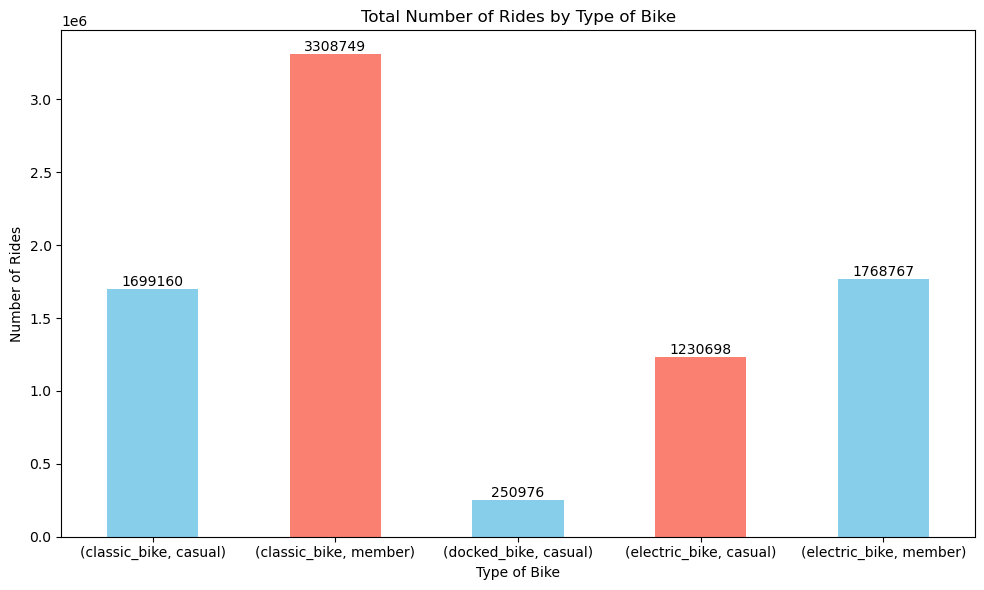

In [50]:
custom_colors = ['skyblue', 'salmon']

ax=rides_count.plot(kind='bar')
# Annotating bars with their values
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Plotting the bar chart for each bike type separated by member type and casual type
rides_count.plot(kind='bar', figsize=(10, 6), color= custom_colors)
plt.xlabel('Type of Bike')
plt.ylabel('Number of Rides')
plt.title('Total Number of Rides by Type of Bike')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The most popular bike among with riders was the CLASSIC.

# Total Number of Rides by Weekdays

In [51]:
# Grouping the data by 'Type of People' and 'Day of Week' and counting the number of rides for each combination
rides_count_weekday = df.groupby(['weekday', 'member_casual']).size()

# Displaying the number orides_count_weekdayf rides for each bike type within each category
print(rides_count_weekday)

weekday  member_casual
0        casual           374632
         member           716039
1        casual           366517
         member           812095
2        casual           371743
         member           806942
3        casual           410527
         member           807792
4        casual           460456
         member           712976
5        casual           656712
         member           649092
6        casual           540247
         member           572580
dtype: int64


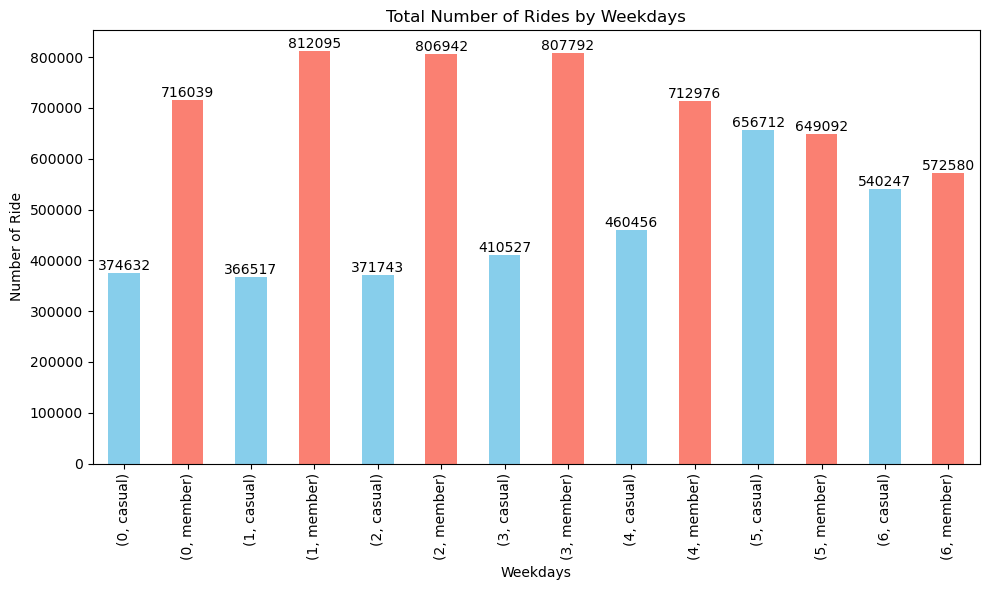

In [52]:
ax=rides_count_weekday.plot(kind='bar')
# Annotating bars with their values
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Plotting the bar chart for each bike type separated by member type and casual type
rides_count_weekday.plot(kind='bar', figsize=(10, 6), color = custom_colors)
plt.xlabel('Weekdays')
plt.ylabel('Number of Ride')
plt.title('Total Number of Rides by Weekdays')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Members has most rides on working days and Casuals has most rides on weekdays

# Total Number of Rides by Hour

In [53]:
# Grouping the data by 'Type of People' and 'Day of Week' and counting the number of rides for each combination
rides_count_Hour = df.groupby(['Hour', 'member_casual']).size()

# Displaying the number orides_count_weekdayf rides for each bike type within each category
print(rides_count_Hour)

Hour  member_casual
0     casual            56506
      member            46039
1     casual            36062
      member            27569
2     casual            21210
      member            15195
3     casual            11513
      member             9375
4     casual             7941
      member            11363
5     casual            15867
      member            49464
6     casual            41966
      member           150043
7     casual            73402
      member           281306
8     casual           100343
      member           336729
9     casual           103307
      member           223074
10    casual           134307
      member           203228
11    casual           173462
      member           241787
12    casual           204375
      member           276983
13    casual           212454
      member           273191
14    casual           222646
      member           273810
15    casual           245679
      member           335978
16    casual        

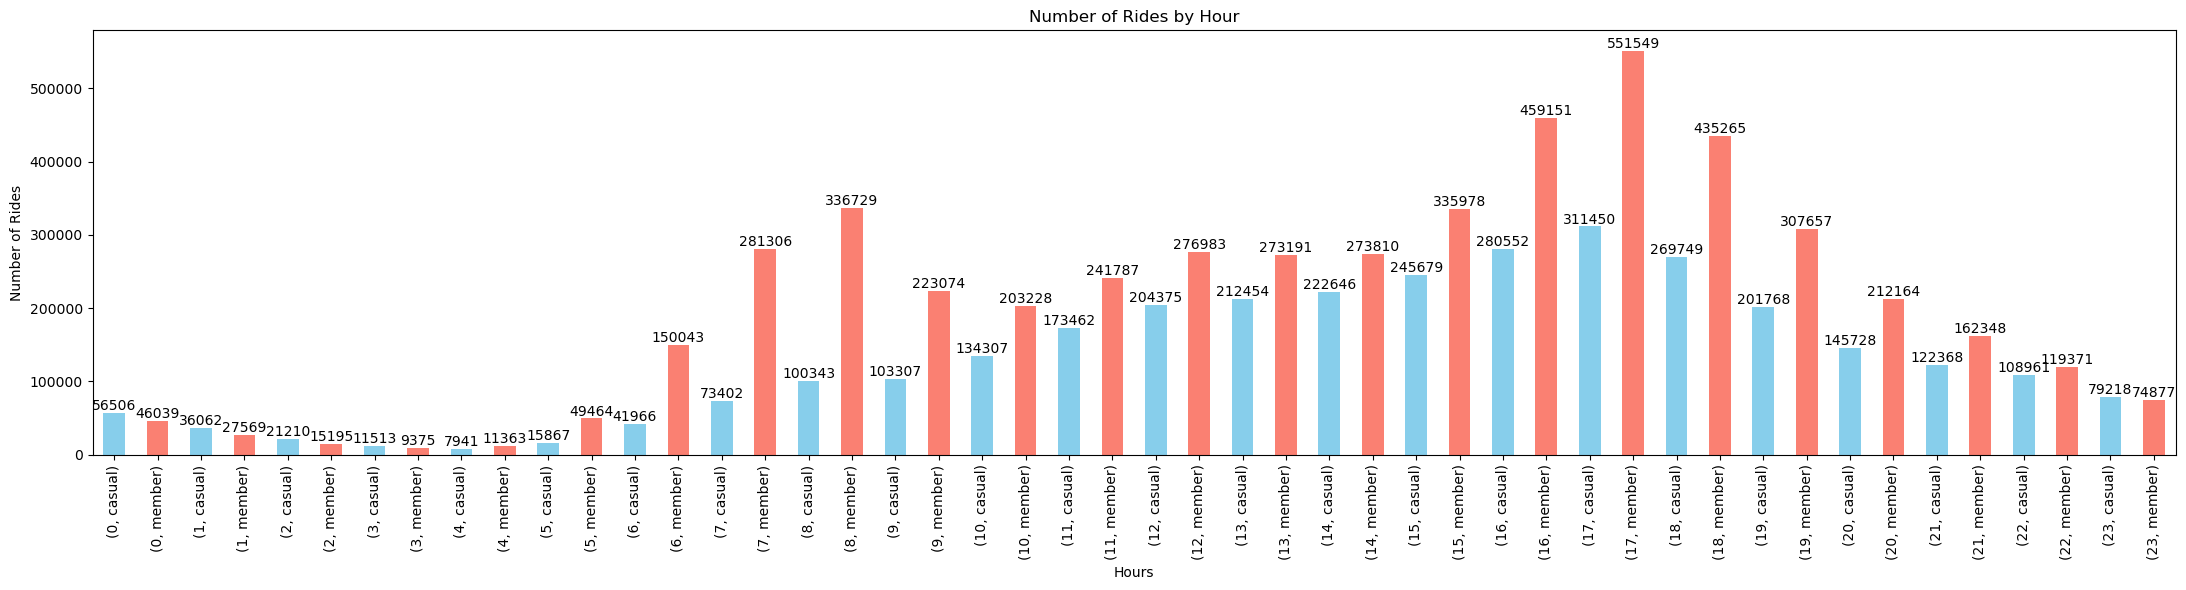

In [54]:
ax=rides_count_Hour.plot(kind='bar')
# Annotating bars with their values
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Plotting the bar chart for each bike type separated by member type and casual type
rides_count_Hour.plot(kind='bar', figsize=(22, 6),color = custom_colors)
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Hour')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Busiest time was afternoon and the peak time was at 5PM for both casual riders and members.

# Total Number of Rides by Hour

In [55]:
# Grouping the data by 'Type of People' and 'Day of Week' and counting the number of rides for each combination
rides_count_Month = df.groupby(['Month', 'member_casual']).size()

# Displaying the number orides_count_weekdayf rides for each bike type within each category
print(rides_count_Month)

Month  member_casual
1      casual            42223
       member           186185
2      casual            47917
       member           190809
3      casual           113936
       member           302468
4      casual           202415
       member           394304
5      casual           397257
       member           568446
6      casual           511831
       member           643199
7      casual           556903
       member           659602
8      casual           503893
       member           686203
9      casual           417843
       member           623831
10     casual           281581
       member           536359
11     casual            73533
       member           182219
12     casual            31502
       member           103891
dtype: int64


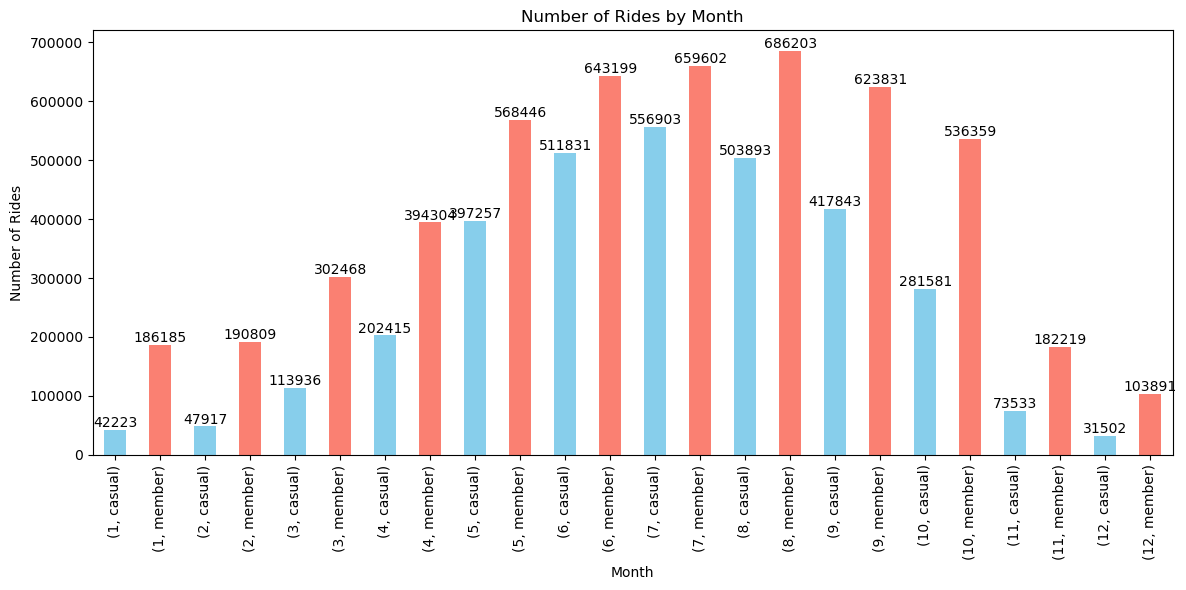

In [57]:
ax=rides_count_Month.plot(kind='bar')
# Annotating bars with their values
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Plotting the bar chart for each bike type separated by member type and casual type
rides_count_Month.plot(kind='bar', figsize=(12, 6),color = custom_colors)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Busiest season was Summer for both types of riders.